# Introduction
We used this dataset which we found on Kaggle (https://www.kaggle.com/datasets/salehahmedrony/global-food-prices/data?select=wfp_food_prices_database.csv)

## Project Goals

## Data Analysis

In [10]:
import numpy as np
import matplotlib as matplt
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [11]:
import os
import pandas as pd
from zipfile import ZipFile

zf = ZipFile('archive.zip', 'r')
zf.extract('wfp_food_prices_database.csv')
zf.close()

df = pd.read_csv('wfp_food_prices_database.csv')
os.remove('wfp_food_prices_database.csv')
df.head(5)

C:\Users\gigaw\AppData\Local\Temp\ipykernel_10836\3752664135.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('wfp_food_prices_database.csv')


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


# How are we cleaning the data?
We only want the retail price of each good, given this is the price that the consumer sees each good at.  Additionally, we found that the dataset had 1.4 million data entries for retail prices, while the other categories (ex. farmgate, wholesale, producer) had under 14 thousand entries.  
We also want so that we work with the data per item in each country. 
We want to combine the mp_month and mp_year into a single datetime tuple.  When creating each date time object we assume that data was consisted collected on the 1st of every month.

In [12]:
# print(df['adm0_name'].unique()) #country
# print(df['adm1_name'].unique()) #provence 
print(df['um_name'].unique())

['KG' 'Day' 'Unit' 'L' 'USD/LCU' '30 pcs' '500 G' '125 G' 'Packet' '900 G'
 '50 Pounds' 'MT' '100 KG' '46 KG' '11.5 KG' 'Pound' 'Cuartilla' 'Libra'
 '5 L' '10 pcs' '90 KG' '1.5 L' '400 G' 'Sack' 'Package' 'Head' '85 G'
 'Gallon' '380 G' '500 ML' 'Month' 'Course' '50 KG' '100 Pounds' '168 G'
 '45 KG' '70 G' '200 G' '68 KG' '109 KG' '91 KG' '93 KG' '10 KG' 'Bunch'
 '250 KG' '100 Tubers' '73 KG' '84 KG' '52 KG' '27 KG' '20 KG' '16 KG'
 '650 G' '750 ML' '115 G' '360 pcs' '50 pcs' '100 pcs' 'Marmite' '350 G'
 '385 G' '1.8 KG' 'Cylinder' '4 pcs' '150 ml' '5 KG' '2 KG' '1.8 L'
 '170 G' '1.5 KG' '300 G' '0.8 KG' '160 G' '750 G' '12.5 KG' '150 G'
 '20 L' '1.3 KG' '185 G' 'Loaf' '2.25 KG' '5 pcs' '200 ML' '250 G' '11 KG'
 'Brush' '100 ML' 'Bar' '250 ML' 'Heap' '1.6 KG' 'Dozen' '100 L' '1.4 KG'
 '20 G' '3.4 KG' '0.5 KG' '1.1 KG' '2.1 KG' '1.2 KG' '3.1 KG' '3.5 KG'
 'Bundle' 'LCU/3.5kg' '25 KG' '3 L' 'Cubic meter' '60 KG' '3 KG' '2.5 KG'
 '700 G' '800 G' '28 pcs' '900 ML' '12 KG' 'kWh' '18 KG']


In [13]:
#  Only keep rows with retail prices
df = df[df['pt_name'] == 'Retail']

In [14]:
# Create Datetime object for each row
# Isolate just the month and date of each row
tempDayMonthDF = df.loc[:, 'mp_month':'mp_year']

# Define a temp method for creating a datetime object from a row of our dataframe
def _create_datetime(row):
    return datetime.date(row[1], row[0], 1)

# Add new datetime row to the dataframe
tempDayMonthDF = tempDayMonthDF.apply(_create_datetime, axis=1)
df.insert(0, "Date", tempDayMonthDF)
df.head()

C:\Users\gigaw\AppData\Local\Temp\ipykernel_10836\5522395.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return datetime.date(row[1], row[0], 1)


,Date,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,2014-01-01,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,2014-02-01,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,2014-03-01,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,2014-04-01,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,2014-05-01,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [15]:
df = df.drop(columns=['adm0_id','adm1_id','cm_id', 'cur_id', 'mp_commoditysource', 'um_id', 'mp_month', 'mp_year', 'pt_name', 'pt_id', 'mkt_id'])
df.head()

,Date,adm0_name,adm1_name,mkt_name,cm_name,cur_name,um_name,mp_price
0,2014-01-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.0
1,2014-02-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.0
2,2014-03-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.0
3,2014-04-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.0
4,2014-05-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.0


In [16]:
# Rename Columns
df = df.rename(columns={'adm0_name': 'Country', 'adm1_name': 'Province/State', 'mkt_name': 'City', 'cm_name':'Product Name','cur_name': 'Currency', 'um_name': 'Units of Measurement', 'mp_price': 'Market Price'})
df

,Date,Country,Province/State,City,Product Name,Currency,Units of Measurement,Market Price
0,2014-01-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.00
1,2014-02-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.00
2,2014-03-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.00
3,2014-04-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.00
4,2014-05-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.00
...,...,...,...,...,...,...,...,...
1560546,2017-09-01,Zimbabwe,Midlands,Vhugwi,"Sugar (white, fortified) - Retail",USD,KG,1.50
1560547,2018-03-01,Zimbabwe,Midlands,Murowa,Beans - Retail,USD,KG,2.80
1560548,2018-03-01,Zimbabwe,Midlands,Murowa,Maize - Retail,USD,KG,0.40
1560549,2018-03-01,Zimbabwe,Midlands,Murowa,Oil (vegetable) - Retail,USD,L,2.35


In [17]:
# Edit data in Product Name to exclude " - Retail"
df['Product Name'] = df['Product Name'].apply(lambda x: x.removesuffix(' - Retail'))
df

,Date,Country,Province/State,City,Product Name,Currency,Units of Measurement,Market Price
0,2014-01-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.00
1,2014-02-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.00
2,2014-03-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.00
3,2014-04-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.00
4,2014-05-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.00
...,...,...,...,...,...,...,...,...
1560546,2017-09-01,Zimbabwe,Midlands,Vhugwi,"Sugar (white, fortified)",USD,KG,1.50
1560547,2018-03-01,Zimbabwe,Midlands,Murowa,Beans,USD,KG,2.80
1560548,2018-03-01,Zimbabwe,Midlands,Murowa,Maize,USD,KG,0.40
1560549,2018-03-01,Zimbabwe,Midlands,Murowa,Oil (vegetable),USD,L,2.35


In [18]:
df.head()


,Date,Country,Province/State,City,Product Name,Currency,Units of Measurement,Market Price
0,2014-01-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.0
1,2014-02-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.0
2,2014-03-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.0
3,2014-04-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.0
4,2014-05-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.0


In [19]:
df2 = df.copy()
cc = df2.groupby(['City','Product Name']).size()
cc = cc.to_frame()
# for city, product in cc:
#     print(city, product)
#     # if product < 12:
#     #     df2.drop(labels=[city,product])
cc

0
City    Product Name                                     
A'zaz   Apples                                         24
        Bananas                                        24
        Beans (white)                                  24
        Bread (bakery)                                 23
        Bread (shop)                                   30
...                                                    ..
Échelle Tomatoes (paste)                                4
        Wage (non-qualified labour, agricultural)       4
        Wage (non-qualified labour, livestock)          4
        Wage (non-qualified labour, non-agricultural)   4
        Wheat flour                                     4

[44836 rows x 1 columns]

In [20]:
cityCounts = df.groupby(['City','Product Name']).size()
cityCounts.to_frame()
# cityCounts['Uruzgan']

# #  ['Fayzabad' 'Mazar' 'Badakhshan' 'Badghis' 'Baghlan' 'Balkh' 'Bamyan'
# #  'Farah' 'Maymana' 'Faryab' 'Ghazni' 'Ghor' 'Hilmand' 'Hirat' 'Jawzjan'
# #  'Kabul' 'Kandahar' 'Kapisa' 'Khost' 'Kunar' 'Kunduz' 'Laghman' 'Logar'
# #  'Jalalabad' 'Nangarhar' 'Nimroz' 'Nuristan' 'Paktika' 'Paktya' 'Parwan'
# #  'Samangan' 'Sar-e-Pul' 'Takhar' 'Uruzgan' 'Maidan Wardak' 'Zabul' 'Nili'
# #  'Daykundi' 'Panjsher']


0
City    Product Name                                     
A'zaz   Apples                                         24
        Bananas                                        24
        Beans (white)                                  24
        Bread (bakery)                                 23
        Bread (shop)                                   30
...                                                    ..
Échelle Tomatoes (paste)                                4
        Wage (non-qualified labour, agricultural)       4
        Wage (non-qualified labour, livestock)          4
        Wage (non-qualified labour, non-agricultural)   4
        Wheat flour                                     4

[44836 rows x 1 columns]

['Fayzabad' 'Mazar' 'Badakhshan' 'Badghis' 'Baghlan' 'Balkh' 'Bamyan'
 'Farah' 'Maymana' 'Faryab' 'Ghazni' 'Ghor' 'Hilmand' 'Hirat' 'Jawzjan'
 'Kabul' 'Kandahar' 'Kapisa' 'Khost' 'Kunar' 'Kunduz' 'Laghman' 'Logar'
 'Jalalabad' 'Nangarhar' 'Nimroz' 'Nuristan' 'Paktika' 'Paktya' 'Parwan'
 'Samangan' 'Sar-e-Pul' 'Takhar' 'Uruzgan' 'Maidan Wardak' 'Zabul' 'Nili'
 'Daykundi' 'Panjsher']


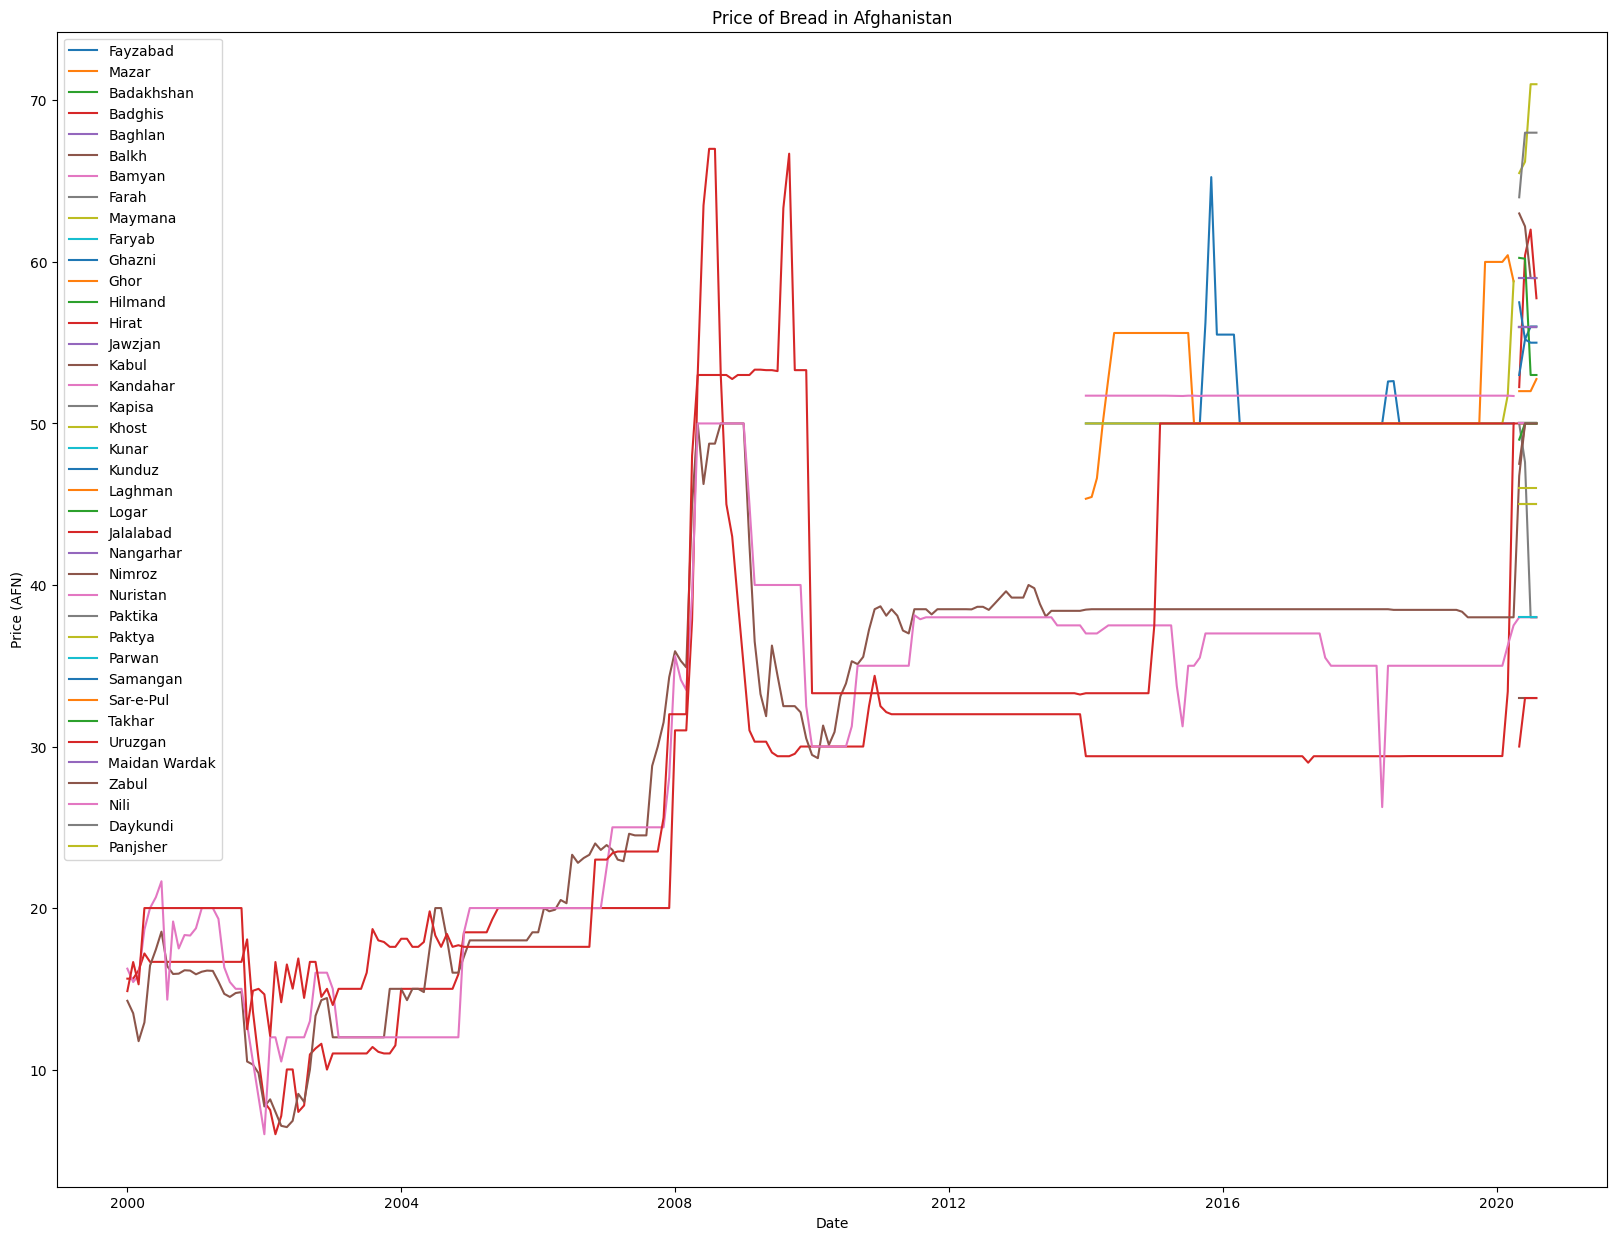

In [21]:
AfghanistanBread = df.loc[(df['Country']=='Afghanistan') & (df['Product Name']=='Bread')]
#bp = AfghanistanBread.groupby('City').plot(x='Date',y='Market Price',kind='scatter')
print(AfghanistanBread['City'].unique())
plt.figure(figsize=(20,15))
for label in AfghanistanBread['City'].unique():
    BreadPriceCity = AfghanistanBread.loc[(AfghanistanBread['City']==label)]
    plt.plot(BreadPriceCity['Date'],BreadPriceCity['Market Price'],label=label);
plt.legend()
plt.title("Price of Bread in Afghanistan")
plt.xlabel("Date")
plt.ylabel("Price (AFN)")
plt.show()

In [22]:
# Define a method to draw a data point graph

def DrawGraph(country, product):
    tempDF = df.loc[(df['Country']== country) & (df['Product Name']== product)]
    print(tempDF['City'].unique())
    plt.figure(figsize=(20,15))
    for label in tempDF['City'].unique():
        productPriceCity = tempDF.loc[(tempDF['City']==label)]
        plt.plot(productPriceCity['Date'],productPriceCity['Market Price'],label=label);
    plt.legend()
    plt.title("Price of {} in {}".format(product, country))
    plt.xlabel("Date")
    plt.ylabel("Price ({})".format(tempDF['Currency'].unique()[0]))
    plt.show()

,Date,Country,Province/State,City,Product Name,Currency,Units of Measurement,Market Price
1556631,2014-09-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93
1556632,2014-10-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93
1556633,2014-11-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93
1556634,2014-12-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93
1556635,2015-02-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.92
...,...,...,...,...,...,...,...,...
1560523,2018-03-01,Zimbabwe,Midlands,Matenda,Oil (vegetable),USD,L,2.25
1560531,2018-03-01,Zimbabwe,Midlands,Mutambi,Oil (vegetable),USD,L,2.25
1560539,2017-09-01,Zimbabwe,Midlands,Vhugwi,Oil (vegetable),USD,L,1.90
1560540,2018-03-01,Zimbabwe,Midlands,Vhugwi,Oil (vegetable),USD,L,2.50


['Renkini Bus Terminus' 'Mbare' 'Sakubva' 'Checheche' 'Murambinda'
 'Bindura' 'Mount Darwin' 'Mushumbi' 'Mahuwe' 'Chikafa' 'Rushinga'
 'Chimhanda' 'Marymount' 'Chomutukutu' 'Nyamatikiti' 'Nyatsatu' 'Kasenzi'
 'Murehwa' 'Kotwa' 'Makaha' 'Suswe' 'Nyamapanda' 'Nyamande' 'Nyamukoho'
 'Murombedzi' 'Negande business centre' 'Kasvisva' 'Mola' 'Mucheke'
 'Ngundu' 'Tshovani' 'Mupandawana' 'Rutenga' 'Neshuro' 'Sarahuro'
 'Nkayi Growth Point' 'Binga centre' 'Hwange Town Bus Terminus' 'Siakobvu'
 'Siphepha' 'Tsholotsho Business Centre' 'Nemane' 'Gwanda town'
 'Dulibadzimu Market' 'Madlambudzi' 'Khame' 'Dombodema' 'Tjankwa' 'Nyele'
 'Marula' 'Plumtree town' 'Ingwizi' 'Brunaperg' 'Mambale' 'Maphisa' 'Kezi'
 'Tshelanyemba' 'Saint Joseph' 'Bazha' 'Homestead' 'Mandava' 'Kombai'
 'Mabasa' 'Matenda' 'Mutambi' 'Vhugwi' 'Murowa']


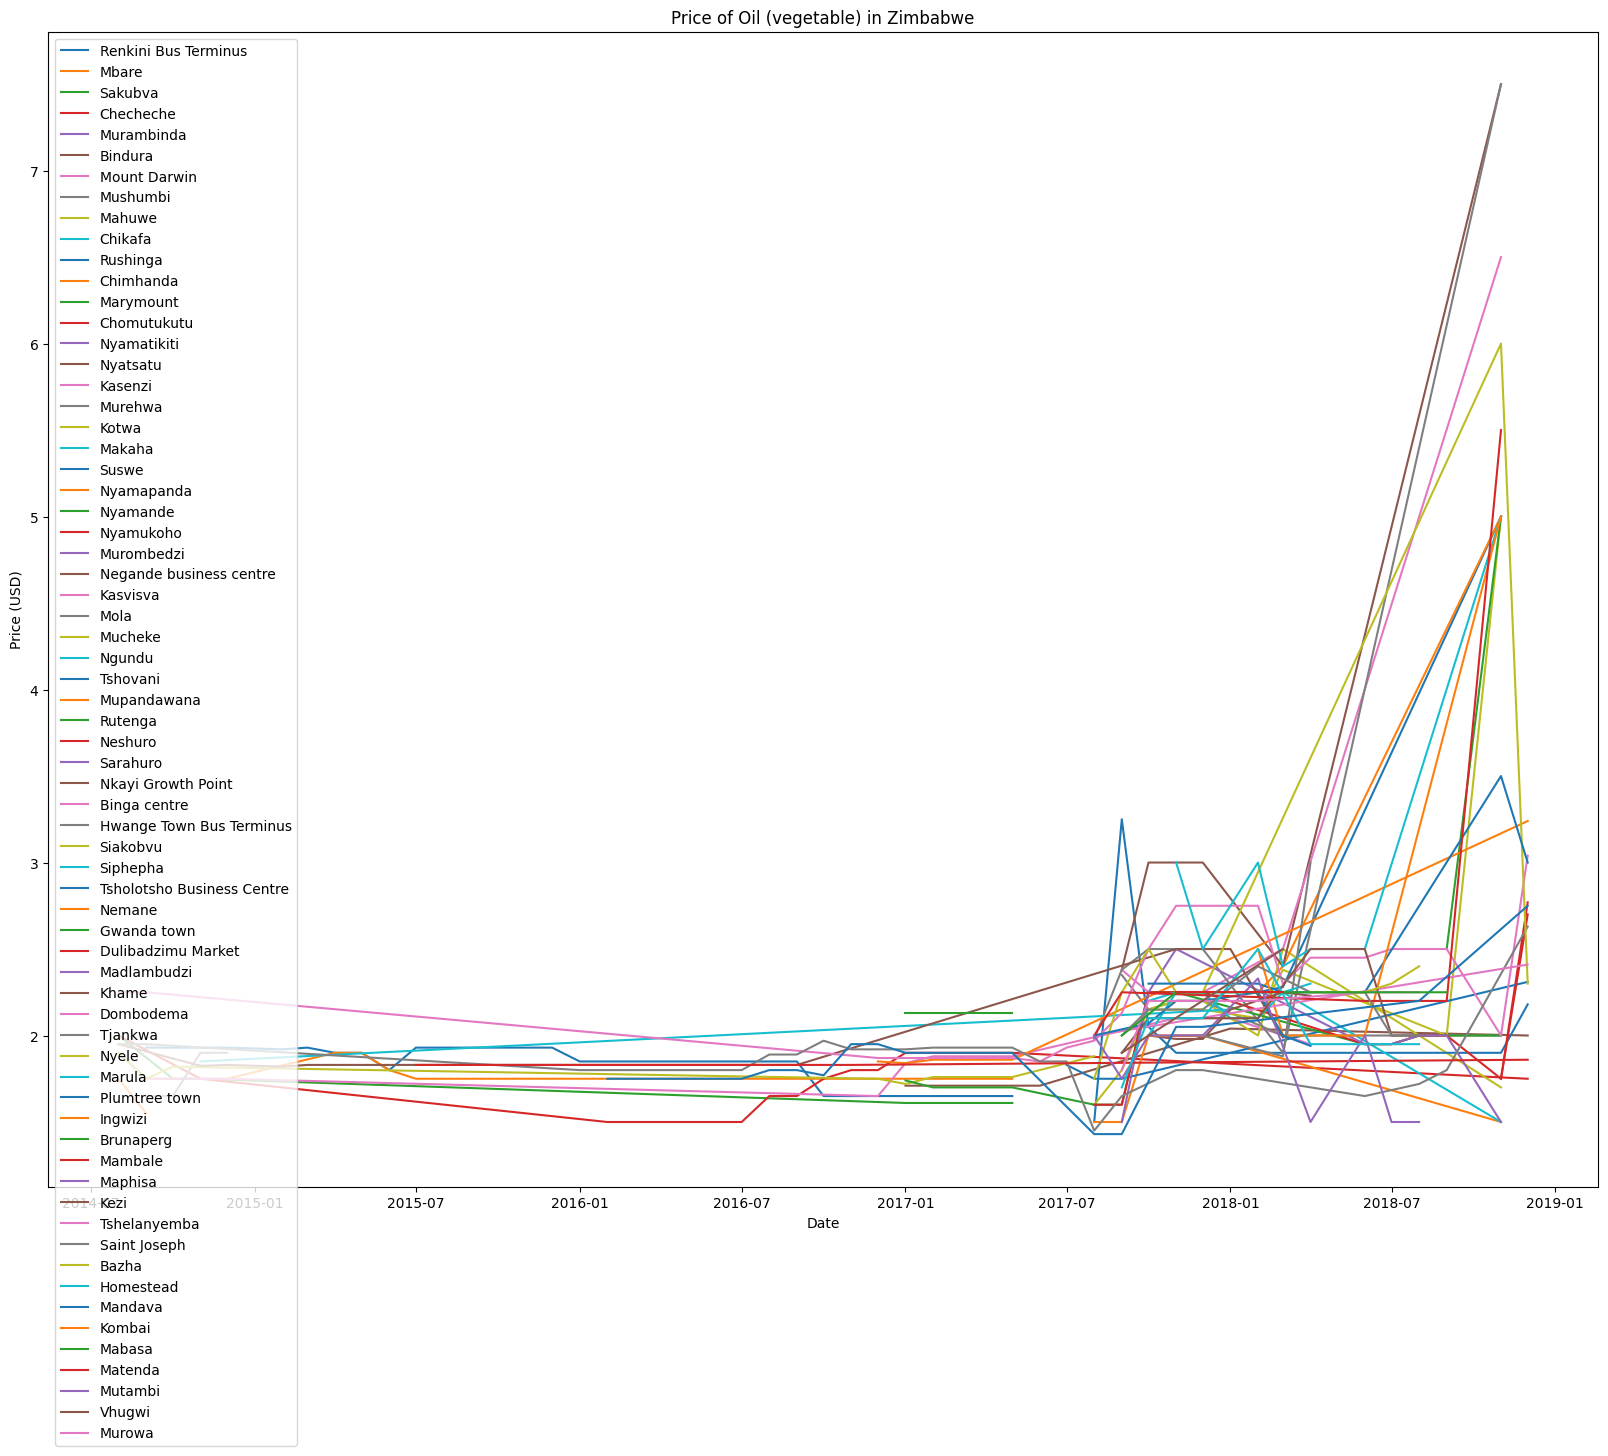

In [23]:
tempDF = df.loc[(df['Country']== 'Zimbabwe') & (df['Product Name']== 'Oil (vegetable)')]
display(tempDF)
DrawGraph('Zimbabwe', 'Oil (vegetable)')

In [24]:
# def getCitySize(country, product):
#     tempDF = df.loc[(df['Country']== country) & (df['Product Name']== product)]
#     return len(tempDF['City'].unique())


# GroupedByCountry = df.groupby(['Country'])
# ProductsByCountry = GroupedByCountry['Product Name'].unique()

# arr = []
# for country, products in ProductsByCountry.items():
#     listOfProducts = products

#     for product in listOfProducts:
#         arr.append(getCitySize(country, product))
# print(arr)


In [25]:
# arr2 = np.array(arr)
# arr2.max()


# # Generating a random number in between 0 and 2^24
# color = random.randrange(0, 2**24)
 
# # Converting that number from base-10
# # (decimal) to base-16 (hexadecimal)
# hex_color = hex(color)
 
# print(hex_color)

# WORKS KINDA
# HEX_COLORS = np.linspace(0, 256, ).tolist()
# HEX_COLORS = list(map(float.hex, HEX_COLORS))
# HEX_COLORS

HEX_COLORS = list(matplt.colors.cnames.values())
NUM_COLORS = len(HEX_COLORS)
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)
print(f"number of colors: {NUM_COLORS}", f"number of styles: {NUM_STYLES}", HEX_COLORS, sep="\n")



number of colors: 148
number of styles: 4
['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF', '#8A2BE2', '#A52A2A', '#DEB887', '#5F9EA0', '#7FFF00', '#D2691E', '#FF7F50', '#6495ED', '#FFF8DC', '#DC143C', '#00FFFF', '#00008B', '#008B8B', '#B8860B', '#A9A9A9', '#006400', '#A9A9A9', '#BDB76B', '#8B008B', '#556B2F', '#FF8C00', '#9932CC', '#8B0000', '#E9967A', '#8FBC8F', '#483D8B', '#2F4F4F', '#2F4F4F', '#00CED1', '#9400D3', '#FF1493', '#00BFFF', '#696969', '#696969', '#1E90FF', '#B22222', '#FFFAF0', '#228B22', '#FF00FF', '#DCDCDC', '#F8F8FF', '#FFD700', '#DAA520', '#808080', '#008000', '#ADFF2F', '#808080', '#F0FFF0', '#FF69B4', '#CD5C5C', '#4B0082', '#FFFFF0', '#F0E68C', '#E6E6FA', '#FFF0F5', '#7CFC00', '#FFFACD', '#ADD8E6', '#F08080', '#E0FFFF', '#FAFAD2', '#D3D3D3', '#90EE90', '#D3D3D3', '#FFB6C1', '#FFA07A', '#20B2AA', '#87CEFA', '#778899', '#778899', '#B0C4DE', '#FFFFE0', '#00FF00', '#32CD32', '#FAF0E6', '#FF00FF', '#800000', 

In [26]:
HEX_COLORS = list(matplt.colors.cnames.values())
NUM_COLORS = len(HEX_COLORS)
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)

class lineAndColor:

    def __init__(self):
        self.colorIndex = -1
        self.styleIndex = 0

    def __tick(self):
        self.colorIndex+=1
        if self.colorIndex >= NUM_COLORS:
            self.colorIndex = 0
            self.styleIndex += 1
        
        if self.styleIndex >= NUM_STYLES:
            self.styleIndex = 0

    def getLineAndColor(self):
        self.__tick()
        return (self.styleIndex, self.colorIndex)
        
        

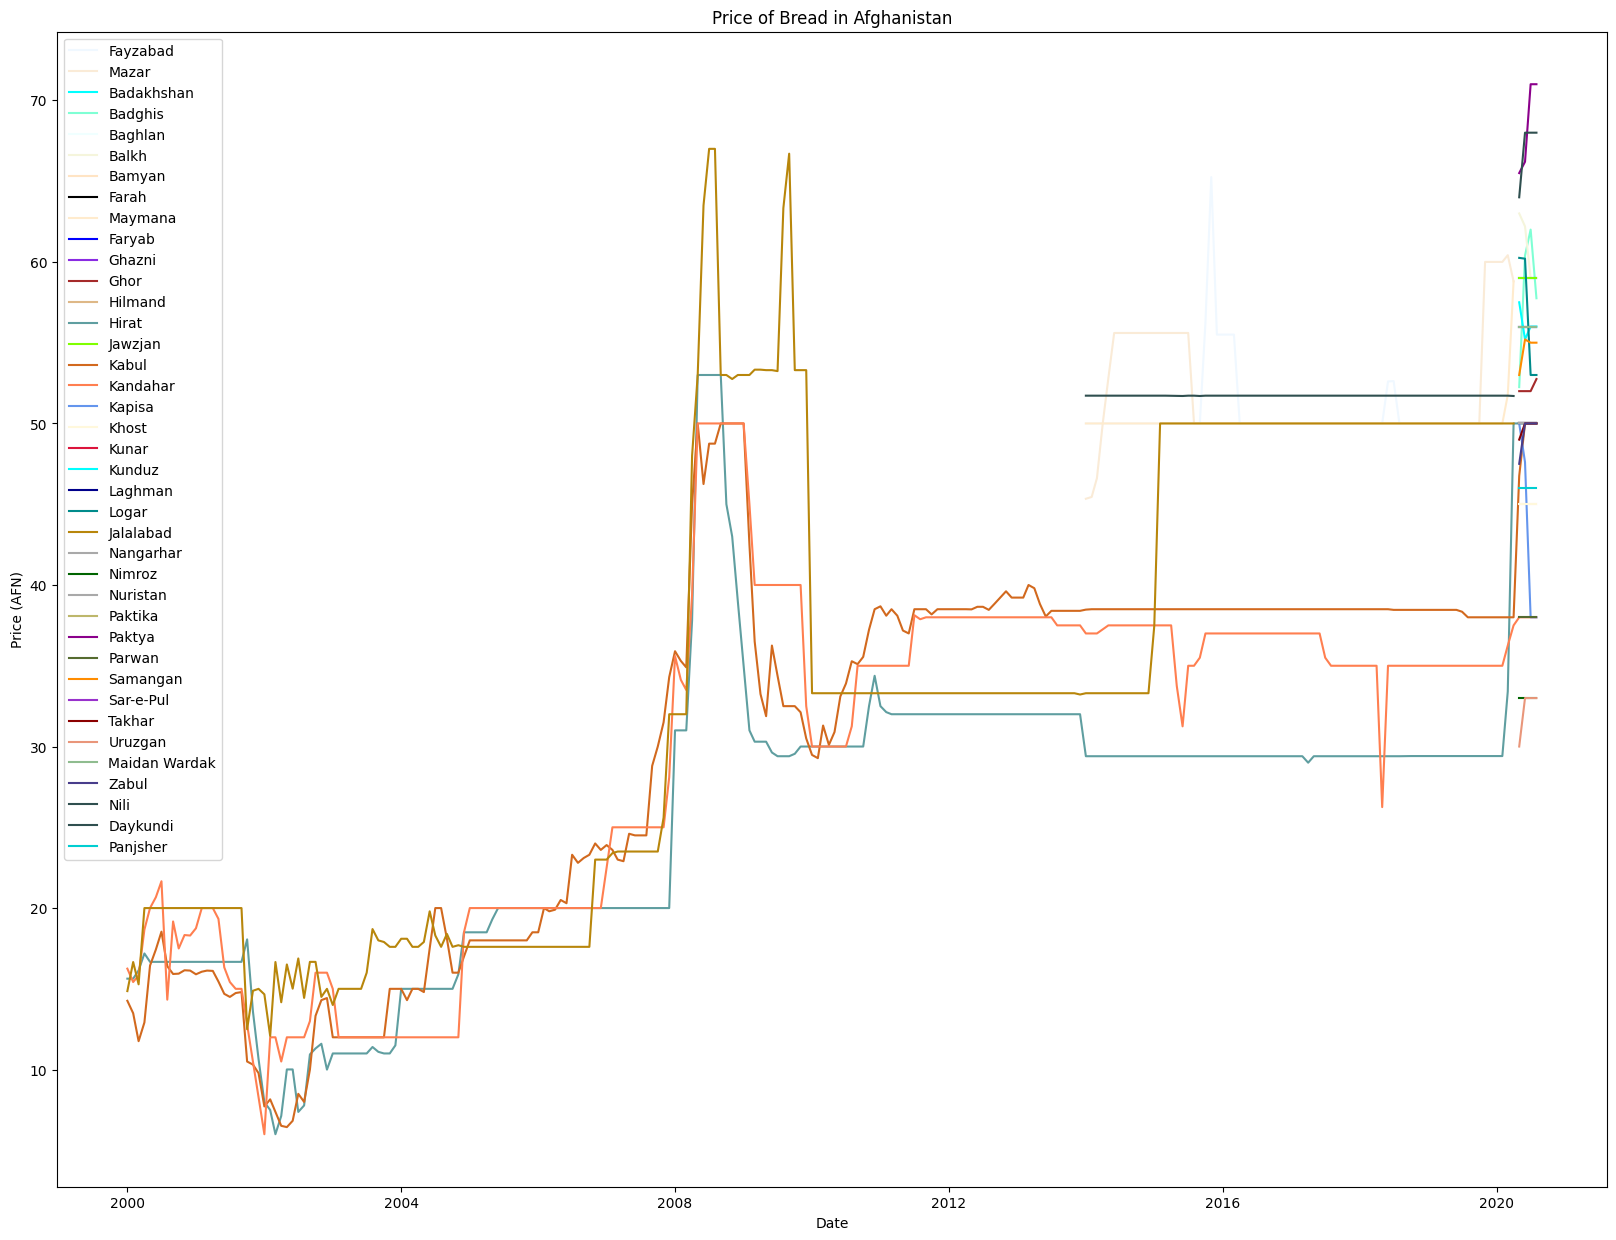

In [27]:
def DrawGraph3(country, product):
    tempDF = df.loc[(df['Country']== country) & (df['Product Name']== product)]
    plt.figure(figsize=(20,15))
    lnc = lineAndColor()

    for label in tempDF['City'].unique():
        lineStyleIndex, hexColorIndex = lnc.getLineAndColor()
        
        productPriceCity = tempDF.loc[(tempDF['City']==label)]
        plt.plot(productPriceCity['Date'],productPriceCity['Market Price'],label=label, color=HEX_COLORS[hexColorIndex], linestyle=LINE_STYLES[lineStyleIndex]);

    plt.legend()
    plt.title("Price of {} in {}".format(product, country))
    plt.xlabel("Date")
    plt.ylabel("Price ({})".format(tempDF['Currency'].unique()[0]))
    plt.show()

DrawGraph3('Afghanistan', 'Bread')

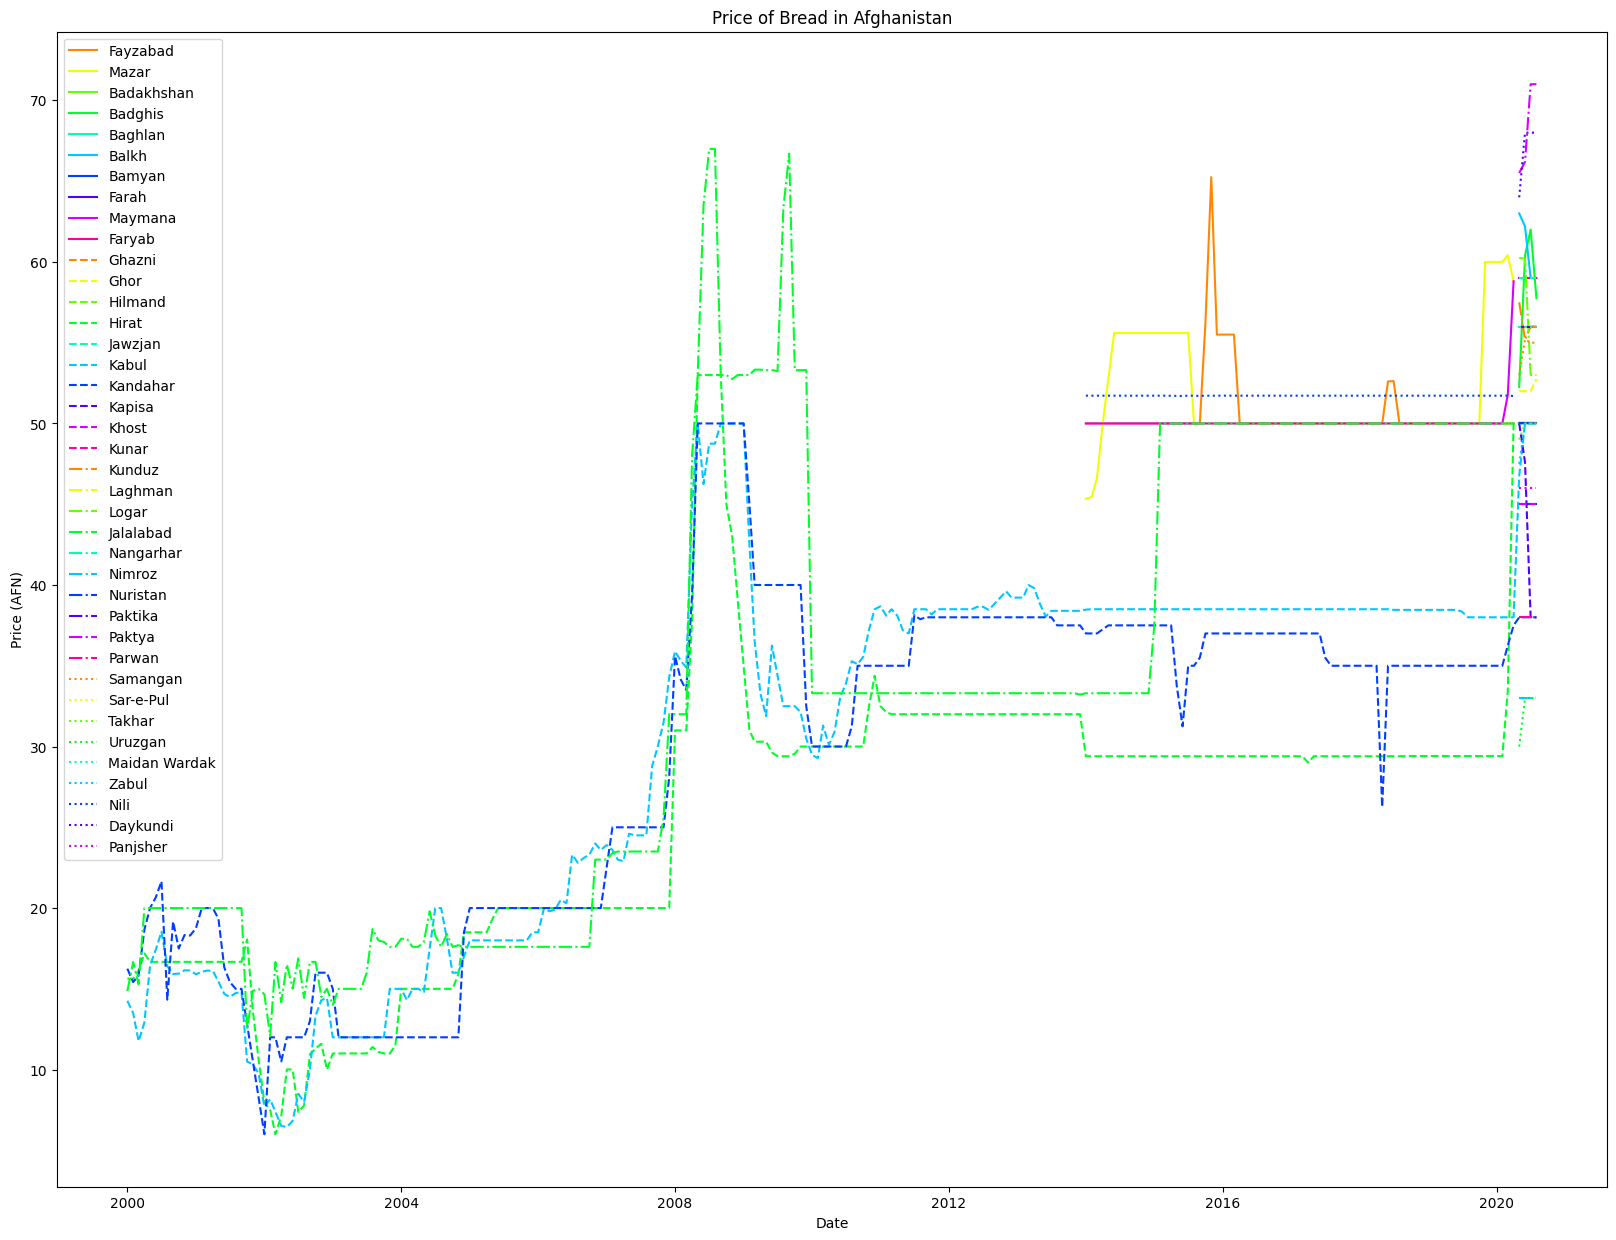

In [28]:
import math
def DrawGraph2(country, product):
    tempDF = df.loc[(df['Country']== country) & (df['Product Name']== product)]
    cities = tempDF['City'].unique()
    sectionSize = math.ceil(len(cities) / NUM_STYLES)
    # print(len(tempDF['City'].unique()))
    # print(sectionSize)
    plt.figure(figsize=(20,15))

    # colorRGBlist = sns.color_palette(palette='gist_rainbow',n_colors = sectionSize)
    colorRGBlist = sns.color_palette(palette='hsv',n_colors = sectionSize)

    hexColorIndex = 0
    lineStyleIndex = -1
    for label_num in range(len(cities)):
        # print("label_num % (math.ceil(len(cities) / NUM_STYLES)) = {0}".format(label_num % (math.ceil(len(cities) / NUM_STYLES))))
        label = cities[label_num]
        if label_num % (math.ceil(len(cities) / NUM_STYLES)) == 0:
            lineStyleIndex+=1
            hexColorIndex = 0


        productPriceCity = tempDF.loc[(tempDF['City']==label)]
        plt.plot(productPriceCity['Date'],productPriceCity['Market Price'],label=label, color=colorRGBlist[hexColorIndex], linestyle=LINE_STYLES[lineStyleIndex]);

        hexColorIndex += 1
    plt.legend()
    plt.title("Price of {} in {}".format(product, country))
    plt.xlabel("Date")
    plt.ylabel("Price ({})".format(tempDF['Currency'].unique()[0]))
    plt.show()

DrawGraph2('Afghanistan', 'Bread')

In [29]:
GroupedByCountry = df.groupby(['Country'])
ProductsByCountry = GroupedByCountry['Product Name'].unique()
display(ProductsByCountry)

# DO NOT RUN, CREATES GRAPHS FOR EVERY COUNTRY

# for country, products in ProductsByCountry.items():
#     listOfProducts = products

#     for product in listOfProducts:
#         # print(country, product)
#         DrawGraph(country, product)



Country
Afghanistan    [Bread, Wheat, Rice (low quality), Wage (quali...
Algeria        [Rice, Bread, Beans (white), Milk, Potatoes, E...
Angola         [Bread, Oil (palm), Cassava flour, Maize flour...
Argentina      [Bread, Wheat flour, Milk, Potatoes, Sugar, Ri...
Armenia        [Fuel (diesel), Fuel (petrol-gasoline), Exchan...
                                     ...                        
Ukraine        [Rice, Milk, Potatoes, Eggs, Sugar, Pasta, Mea...
Venezuela                           [Exchange rate (unofficial)]
Yemen          [Wheat flour, Rice (imported), Beans (white), ...
Zambia         [Maize (white), Sorghum, Rice (local), Millet,...
Zimbabwe       [Beans, Maize, Sorghum, Millet, Wheat, Oil (ve...
Name: Product Name, Length: 89, dtype: object

,Date,Country,Province/State,City,Product Name,Currency,Units of Measurement,Market Price
1556631,2014-09-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93
1556632,2014-10-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93
1556633,2014-11-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93
1556634,2014-12-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93
1556635,2015-02-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.92
...,...,...,...,...,...,...,...,...
1560523,2018-03-01,Zimbabwe,Midlands,Matenda,Oil (vegetable),USD,L,2.25
1560531,2018-03-01,Zimbabwe,Midlands,Mutambi,Oil (vegetable),USD,L,2.25
1560539,2017-09-01,Zimbabwe,Midlands,Vhugwi,Oil (vegetable),USD,L,1.90
1560540,2018-03-01,Zimbabwe,Midlands,Vhugwi,Oil (vegetable),USD,L,2.50


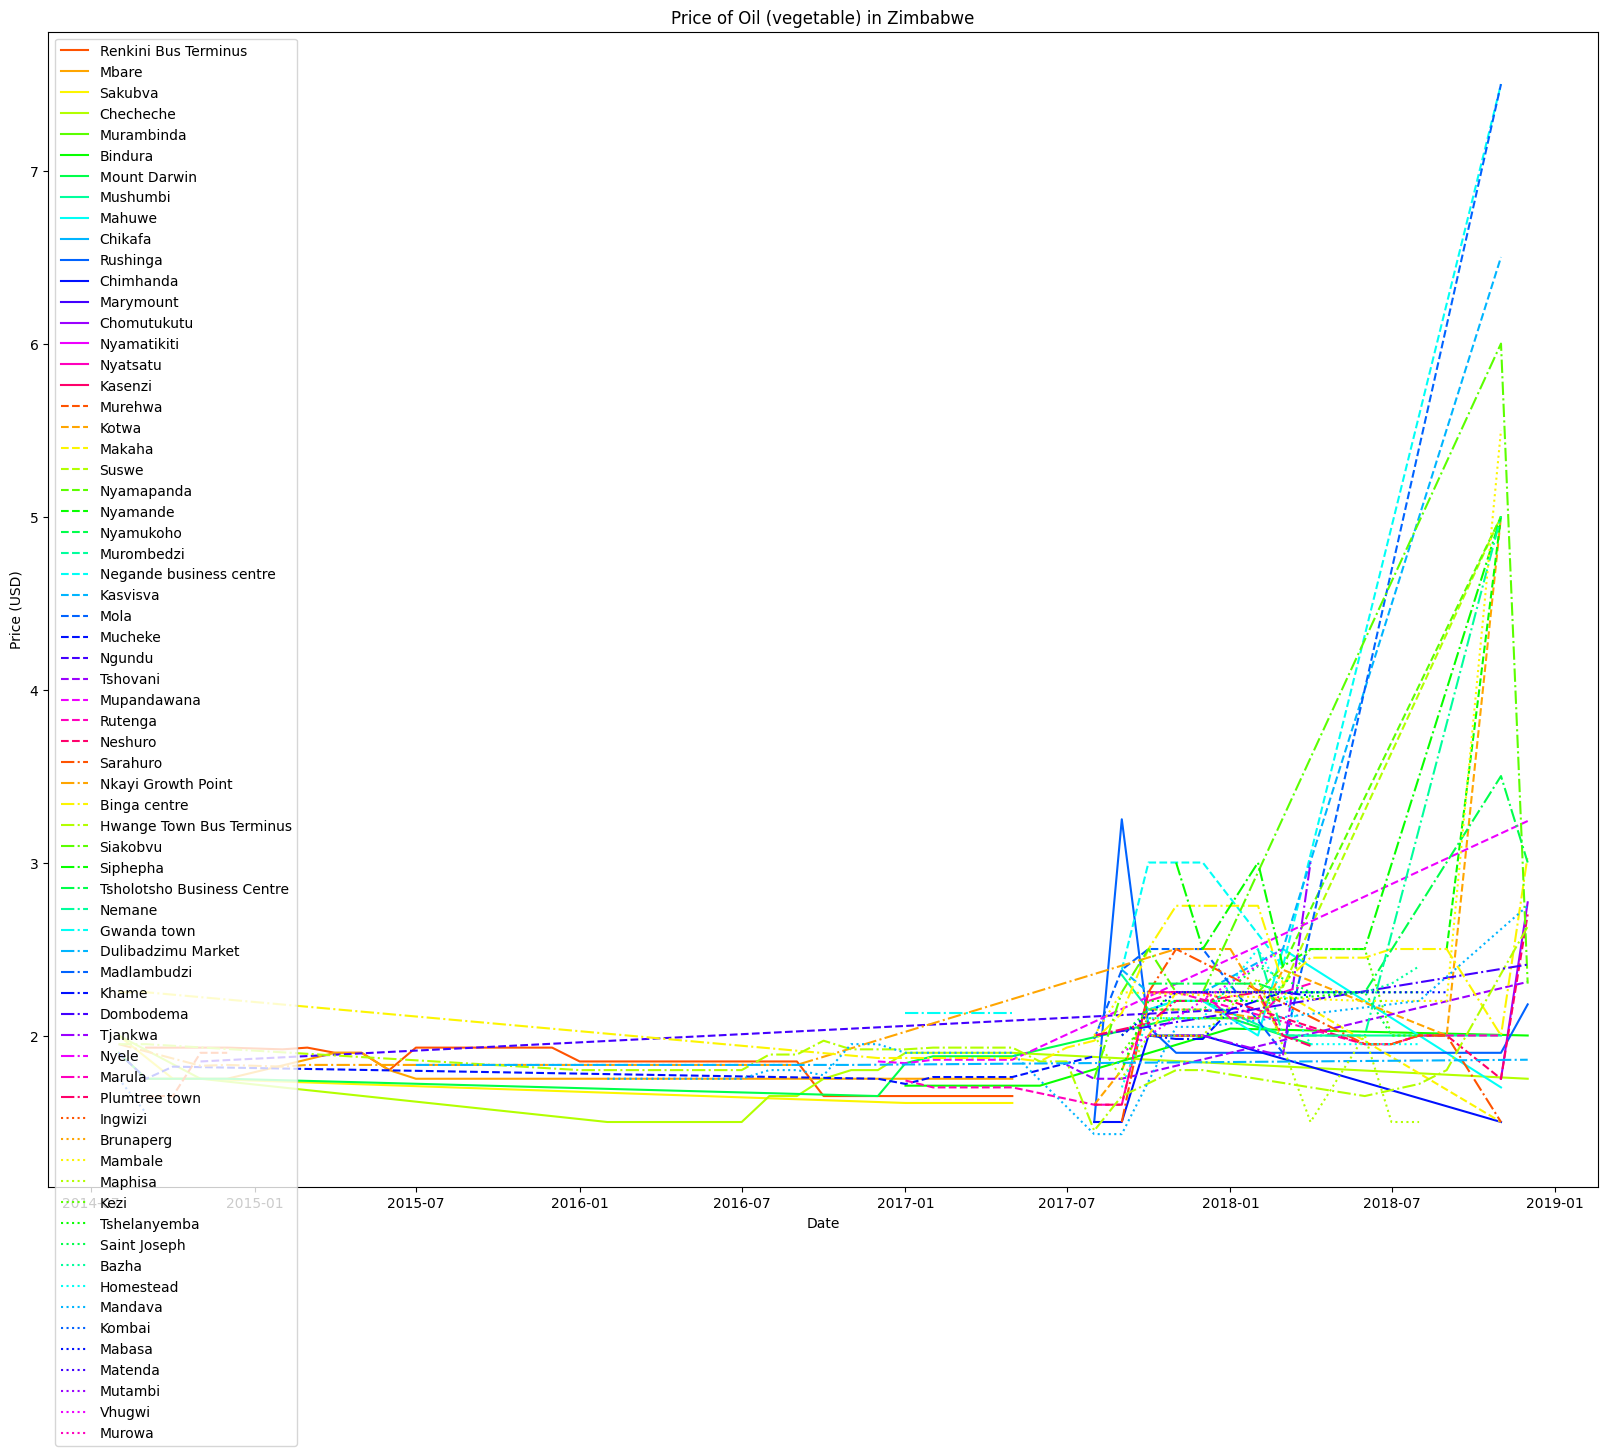

In [30]:
tempDF = df.loc[(df['Country']== 'Zimbabwe') & (df['Product Name']== 'Oil (vegetable)')]
display(tempDF)
DrawGraph2('Zimbabwe', 'Oil (vegetable)')

In [31]:
# Line of best fit (stack overflow)
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# DrawGraph2('Afghanistan', 'Bread')


In [32]:
def datetimeToFloat(d):
    epoch = d.fromtimestamp(0)
    total_seconds =  (d - epoch).total_seconds()
    return total_seconds

d = df['Date'][0]
datetimeToFloat(d)

dataframe =df['Date']
# display(dataframe)

datesInSeconds = dataframe.apply(datetimeToFloat)
display(dataframe)
display(datesInSeconds)

0          2014-01-01
1          2014-02-01
2          2014-03-01
3          2014-04-01
4          2014-05-01
              ...    
1560546    2017-09-01
1560547    2018-03-01
1560548    2018-03-01
1560549    2018-03-01
1560550    2018-03-01
Name: Date, Length: 1417492, dtype: object

0          1.388621e+09
1          1.391299e+09
2          1.393718e+09
3          1.396397e+09
4          1.398989e+09
               ...     
1560546    1.504310e+09
1560547    1.519949e+09
1560548    1.519949e+09
1560549    1.519949e+09
1560550    1.519949e+09
Name: Date, Length: 1417492, dtype: float64

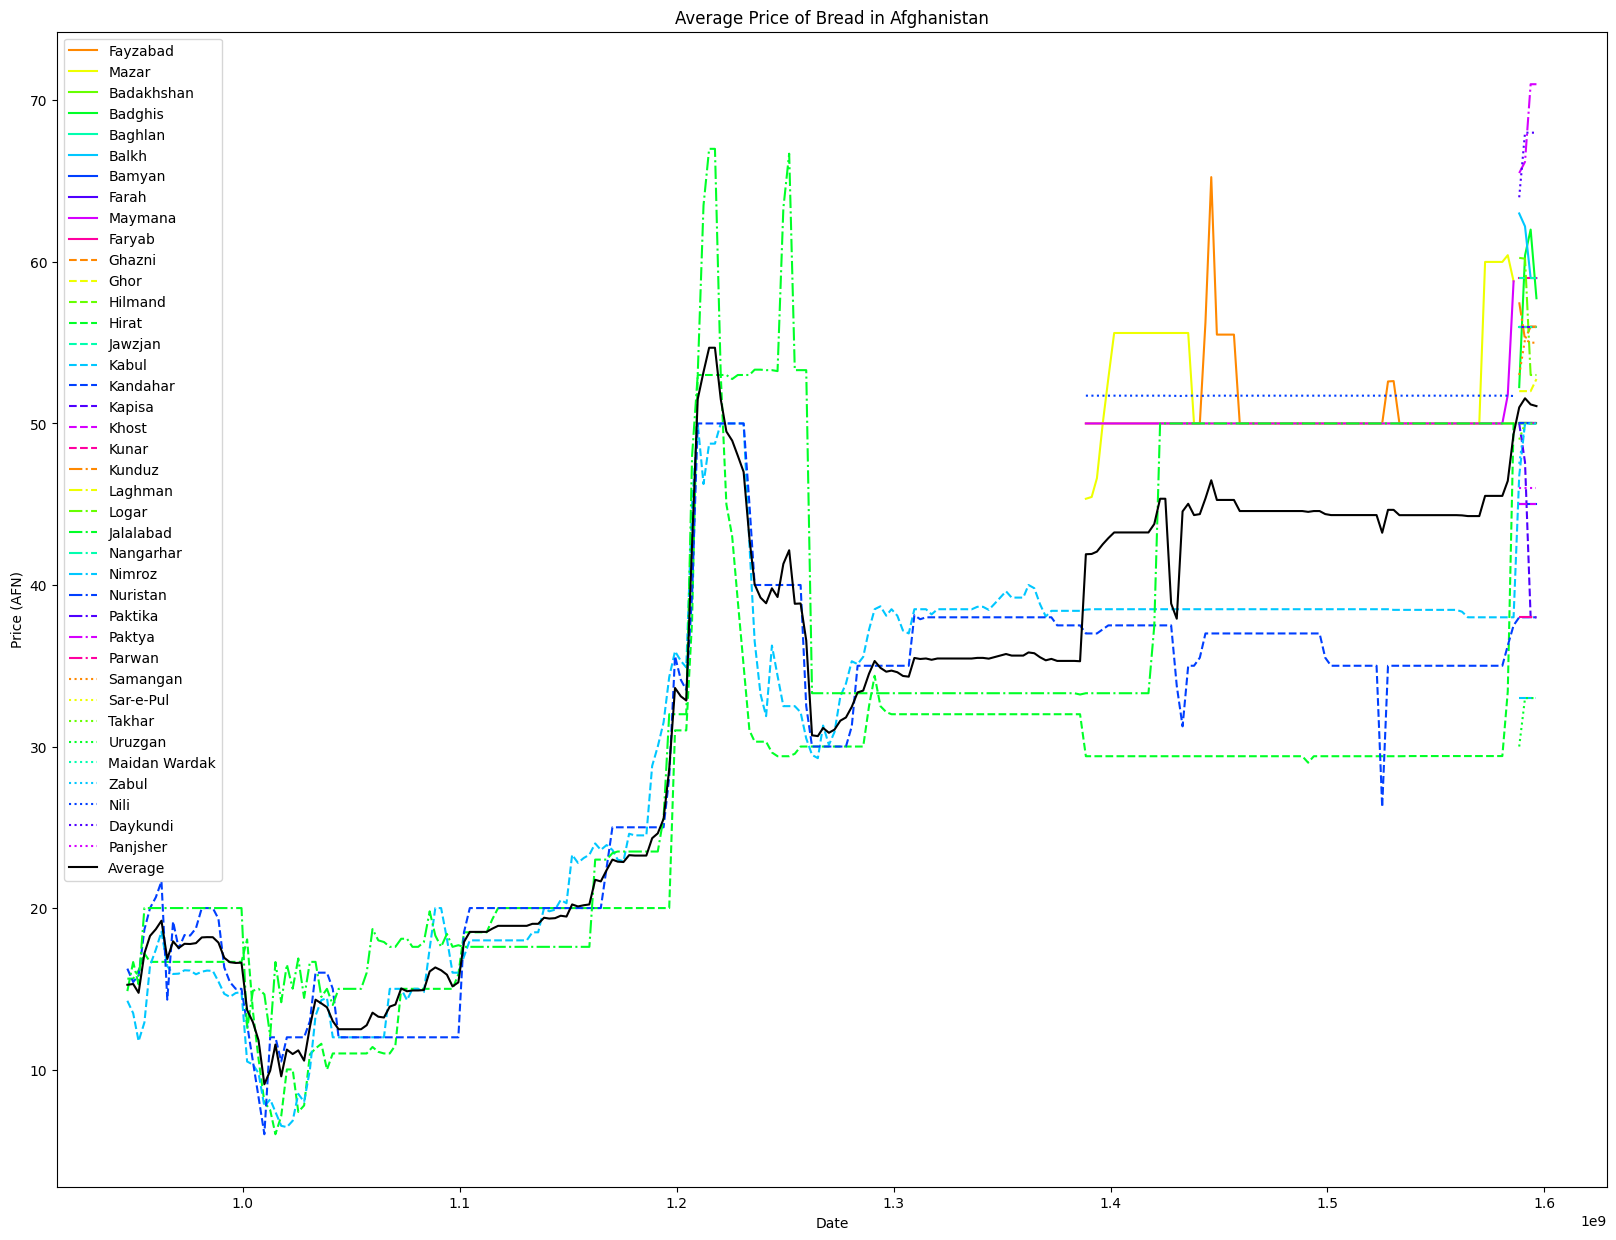

In [33]:
def DrawAverageGraph(country, product):
    DF_ProductDetails = df.loc[(df['Country']== country) & (df['Product Name']== product)]
    cities = DF_ProductDetails['City'].unique()
    sectionSize = math.ceil(len(cities) / NUM_STYLES)
    # print(len(tempDF['City'].unique()))
    # print(sectionSize)
    plt.figure(figsize=(20,15))

    # colorRGBlist = sns.color_palette(palette='gist_rainbow',n_colors = sectionSize)
    colorRGBlist = sns.color_palette(palette='hsv',n_colors = sectionSize)

    hexColorIndex = 0
    lineStyleIndex = -1

    #Create empty df with Date, province, market, price
    # display(DF_ProductDetails)
    DF_AverageMarketPrice =  DF_ProductDetails.groupby('Date')['Market Price'].mean()
    DF_AverageMarketPrice = DF_AverageMarketPrice.reset_index()
    # display(test)

    for label_num in range(len(cities)):
        # print("label_num % (math.ceil(len(cities) / NUM_STYLES)) = {0}".format(label_num % (math.ceil(len(cities) / NUM_STYLES))))
        label = cities[label_num]
        if label_num % (math.ceil(len(cities) / NUM_STYLES)) == 0:
            lineStyleIndex+=1
            hexColorIndex = 0


        productPriceCity = DF_ProductDetails.loc[(DF_ProductDetails['City']==label)]
        plt.plot(productPriceCity['Date'].apply(datetimeToFloat),productPriceCity['Market Price'],label=label, color=colorRGBlist[hexColorIndex], linestyle=LINE_STYLES[lineStyleIndex]);
        # sns.regplot(x=productPriceCity['Date'].apply(datetimeToFloat),y=productPriceCity['Market Price'],label=label, color=colorRGBlist[hexColorIndex], logx=True);
        # sns.regplot(x=DF_AverageMarketPrice['Date'].apply(datetimeToFloat),y=DF_AverageMarketPrice['Market Price'],label=label, color=colorRGBlist[hexColorIndex]);
        hexColorIndex += 1
    plt.plot(DF_AverageMarketPrice['Date'].apply(datetimeToFloat),DF_AverageMarketPrice['Market Price'],label="Average", color='black');

        
    plt.legend()
    plt.title("Average Price of {} in {}".format(product, country))
    plt.xlabel("Date")
    plt.ylabel("Price ({})".format(DF_ProductDetails['Currency'].unique()[0]))
    plt.show()

country = "Afghanistan"
product = "Bread"
DrawAverageGraph(country, product)
# DrawAverageGraph('Zimbabwe', 'Oil (vegetable)')

,Date,Country,Province/State,City,Product Name,Currency,Units of Measurement,Market Price
0,2014-01-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.0
1,2014-02-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.0
2,2014-03-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.0
3,2014-04-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.0
4,2014-05-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.0
...,...,...,...,...,...,...,...,...
10083,2020-08-01,Afghanistan,Daykundi,Daykundi,Bread,AFN,KG,68.0
10136,2020-05-01,Afghanistan,Panjsher,Panjsher,Bread,AFN,KG,46.0
10137,2020-06-01,Afghanistan,Panjsher,Panjsher,Bread,AFN,KG,46.0
10138,2020-07-01,Afghanistan,Panjsher,Panjsher,Bread,AFN,KG,46.0


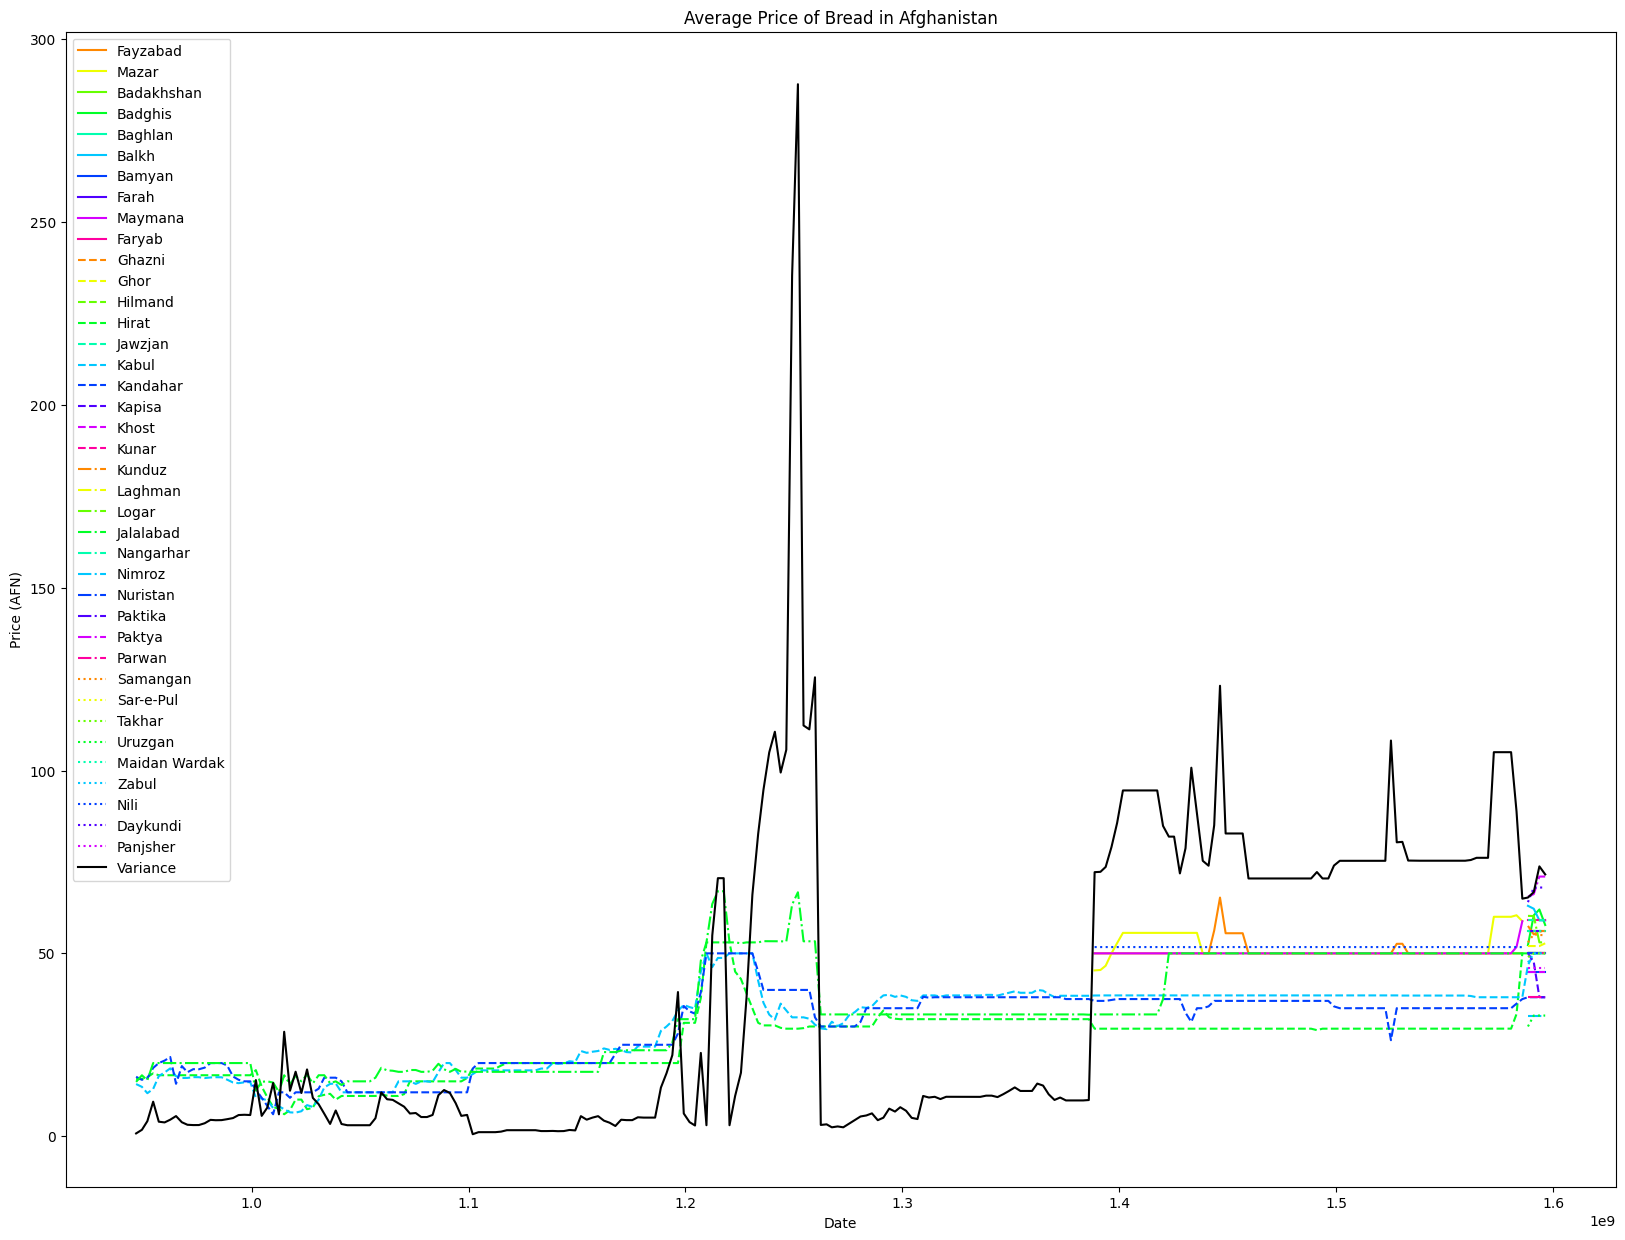

,Date,Country,Province/State,City,Product Name,Currency,Units of Measurement,Market Price
1556631,2014-09-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93
1556632,2014-10-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93
1556633,2014-11-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93
1556634,2014-12-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93
1556635,2015-02-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.92
...,...,...,...,...,...,...,...,...
1560523,2018-03-01,Zimbabwe,Midlands,Matenda,Oil (vegetable),USD,L,2.25
1560531,2018-03-01,Zimbabwe,Midlands,Mutambi,Oil (vegetable),USD,L,2.25
1560539,2017-09-01,Zimbabwe,Midlands,Vhugwi,Oil (vegetable),USD,L,1.90
1560540,2018-03-01,Zimbabwe,Midlands,Vhugwi,Oil (vegetable),USD,L,2.50


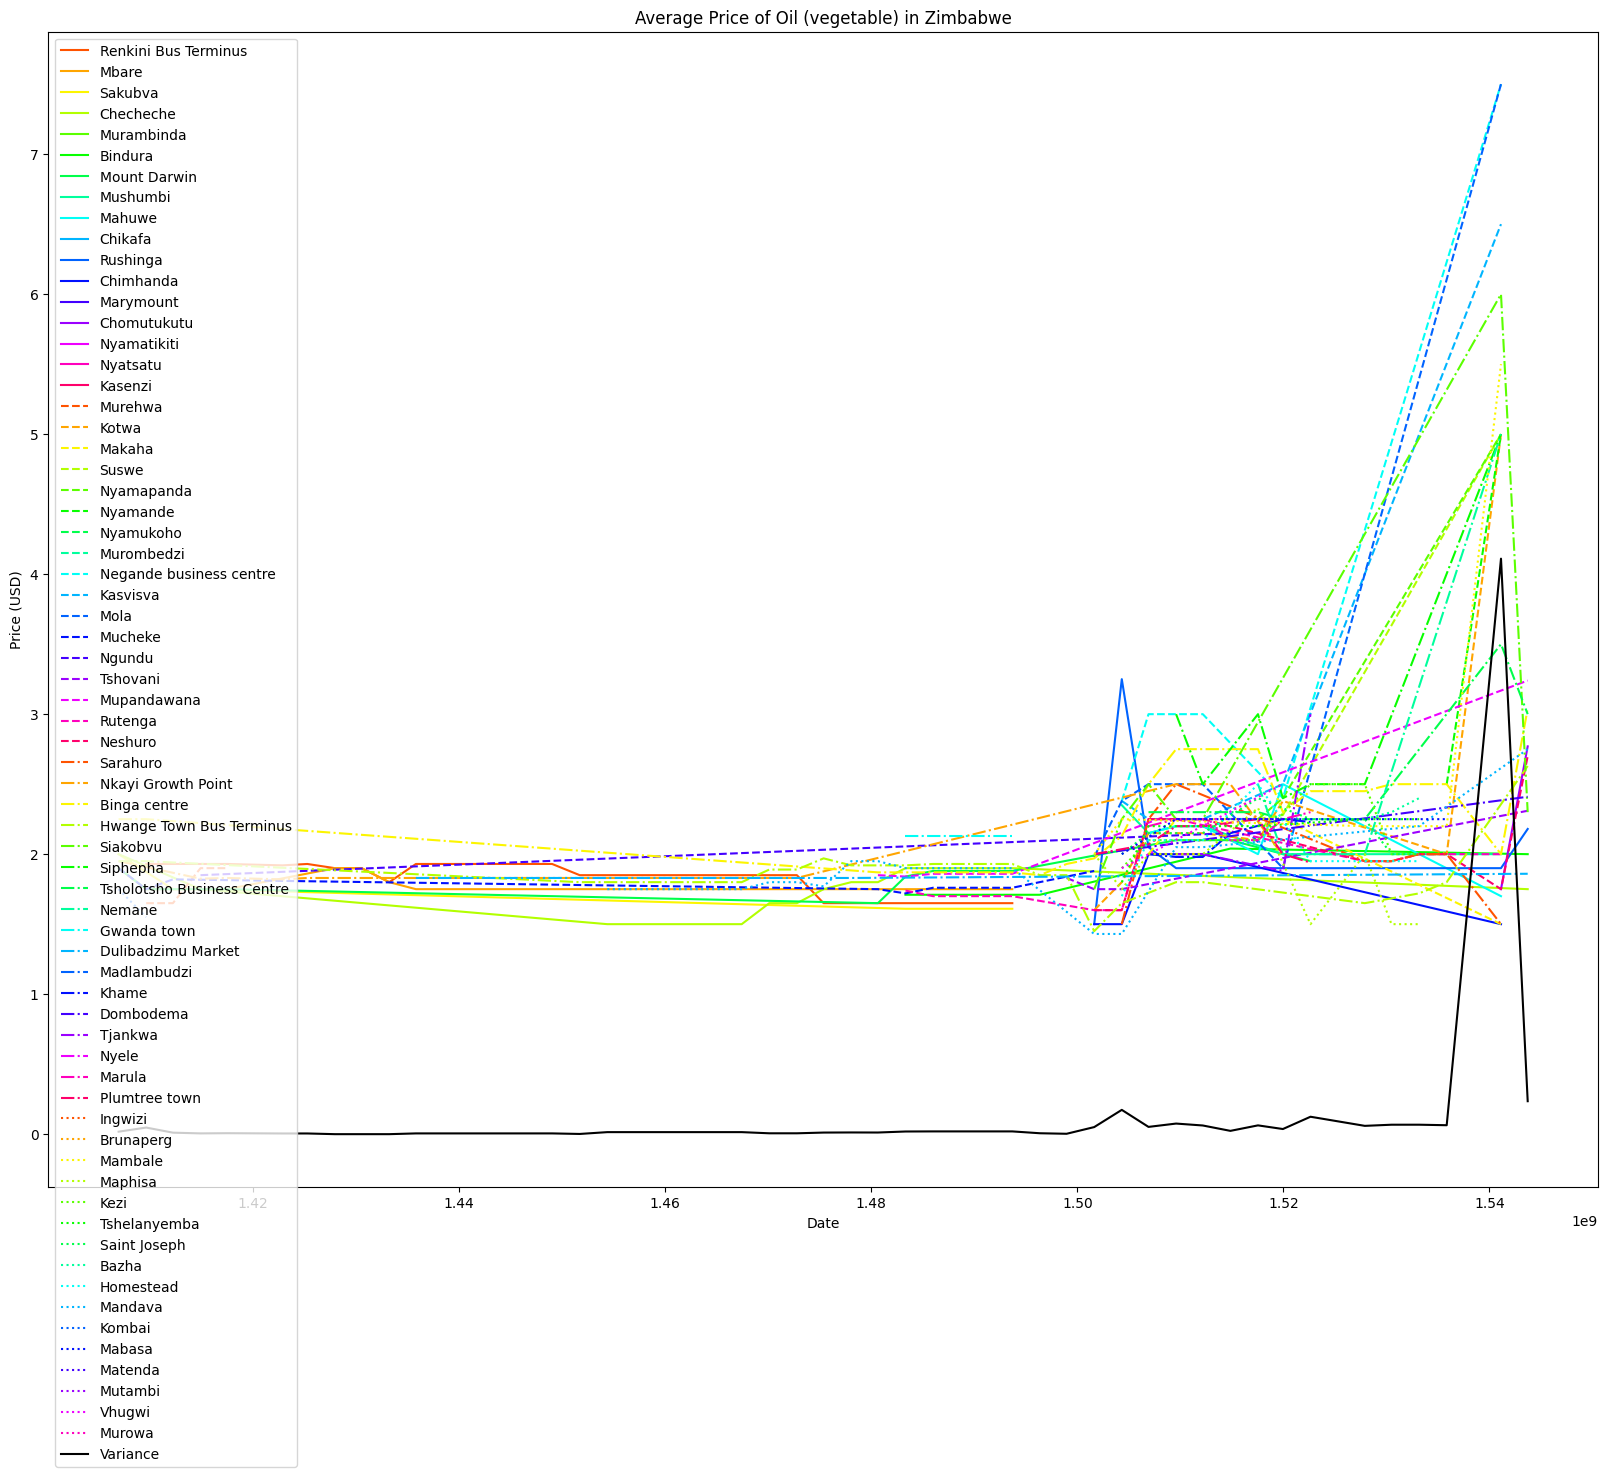

In [34]:
def DrawAverageGraph(country, product):
    DF_ProductDetails = df.loc[(df['Country']== country) & (df['Product Name']== product)]
    cities = DF_ProductDetails['City'].unique()
    sectionSize = math.ceil(len(cities) / NUM_STYLES)
    # print(len(tempDF['City'].unique()))
    # print(sectionSize)
    plt.figure(figsize=(20,15))

    # colorRGBlist = sns.color_palette(palette='gist_rainbow',n_colors = sectionSize)
    colorRGBlist = sns.color_palette(palette='hsv',n_colors = sectionSize)

    hexColorIndex = 0
    lineStyleIndex = -1

    #Create empty df with Date, province, market, price
    display(DF_ProductDetails)
    DF_AverageMarketPrice =  DF_ProductDetails.groupby('Date')['Market Price'].var()
    DF_AverageMarketPrice = DF_AverageMarketPrice.reset_index()
    # display(test)

    for label_num in range(len(cities)):
        # print("label_num % (math.ceil(len(cities) / NUM_STYLES)) = {0}".format(label_num % (math.ceil(len(cities) / NUM_STYLES))))
        label = cities[label_num]
        if label_num % (math.ceil(len(cities) / NUM_STYLES)) == 0:
            lineStyleIndex+=1
            hexColorIndex = 0


        productPriceCity = DF_ProductDetails.loc[(DF_ProductDetails['City']==label)]
        plt.plot(productPriceCity['Date'].apply(datetimeToFloat),productPriceCity['Market Price'],label=label, color=colorRGBlist[hexColorIndex], linestyle=LINE_STYLES[lineStyleIndex]);
        # sns.regplot(x=productPriceCity['Date'].apply(datetimeToFloat),y=productPriceCity['Market Price'],label=label, color=colorRGBlist[hexColorIndex], logx=True);
        # sns.regplot(x=DF_AverageMarketPrice['Date'].apply(datetimeToFloat),y=DF_AverageMarketPrice['Market Price'],label=label, color=colorRGBlist[hexColorIndex]);
        hexColorIndex += 1
    plt.plot(DF_AverageMarketPrice['Date'].apply(datetimeToFloat),DF_AverageMarketPrice['Market Price'],label="Variance", color='black');

        
    plt.legend()
    plt.title("Average Price of {} in {}".format(product, country))
    plt.xlabel("Date")
    plt.ylabel("Price ({})".format(DF_ProductDetails['Currency'].unique()[0]))
    plt.show()

country = "Afghanistan"
product = "Bread"
DrawAverageGraph(country, product)
DrawAverageGraph('Zimbabwe', 'Oil (vegetable)')

In [35]:
from sklearn.linear_model import LinearRegression

def scatterGraph(country, product):
    model = LinearRegression()
    tempDF = df.loc[(df['Country']== country) & (df['Product Name']== product)]
    test =  tempDF.groupby('Date').mean()
    cities = tempDF['City'].unique()
    sectionSize = math.ceil(len(cities) / NUM_STYLES)
    # print(len(tempDF['City'].unique()))
    # print(sectionSize)
    plt.figure(figsize=(20,15))

    # colorRGBlist = sns.color_palette(palette='gist_rainbow',n_colors = sectionSize)
    colorRGBlist = sns.color_palette(palette='hsv',n_colors = sectionSize)

    hexColorIndex = 0
    lineStyleIndex = -1
    for label_num in range(len(cities)):
        # print("label_num % (math.ceil(len(cities) / NUM_STYLES)) = {0}".format(label_num % (math.ceil(len(cities) / NUM_STYLES))))
        label = cities[label_num]
        if label_num % (math.ceil(len(cities) / NUM_STYLES)) == 0:
            lineStyleIndex+=1
            hexColorIndex = 0


        productPriceCity = tempDF.loc[(tempDF['City']==label)]
        plt.scatter(productPriceCity['Date'],productPriceCity['Market Price'],label=label, color=colorRGBlist[hexColorIndex]);

        hexColorIndex += 1
    plt.plot(test['Date'],test[] )
    plt.legend()
    plt.title("Price of {} in {}".format(product, country))
    plt.xlabel("Date")
    plt.ylabel("Price ({})".format(tempDF['Currency'].unique()[0]))
    plt.show()

scatterGraph('Afghanistan', 'Bread')

SyntaxError: invalid syntax (1695237103.py, line 30)

<class 'numpy.ndarray'>


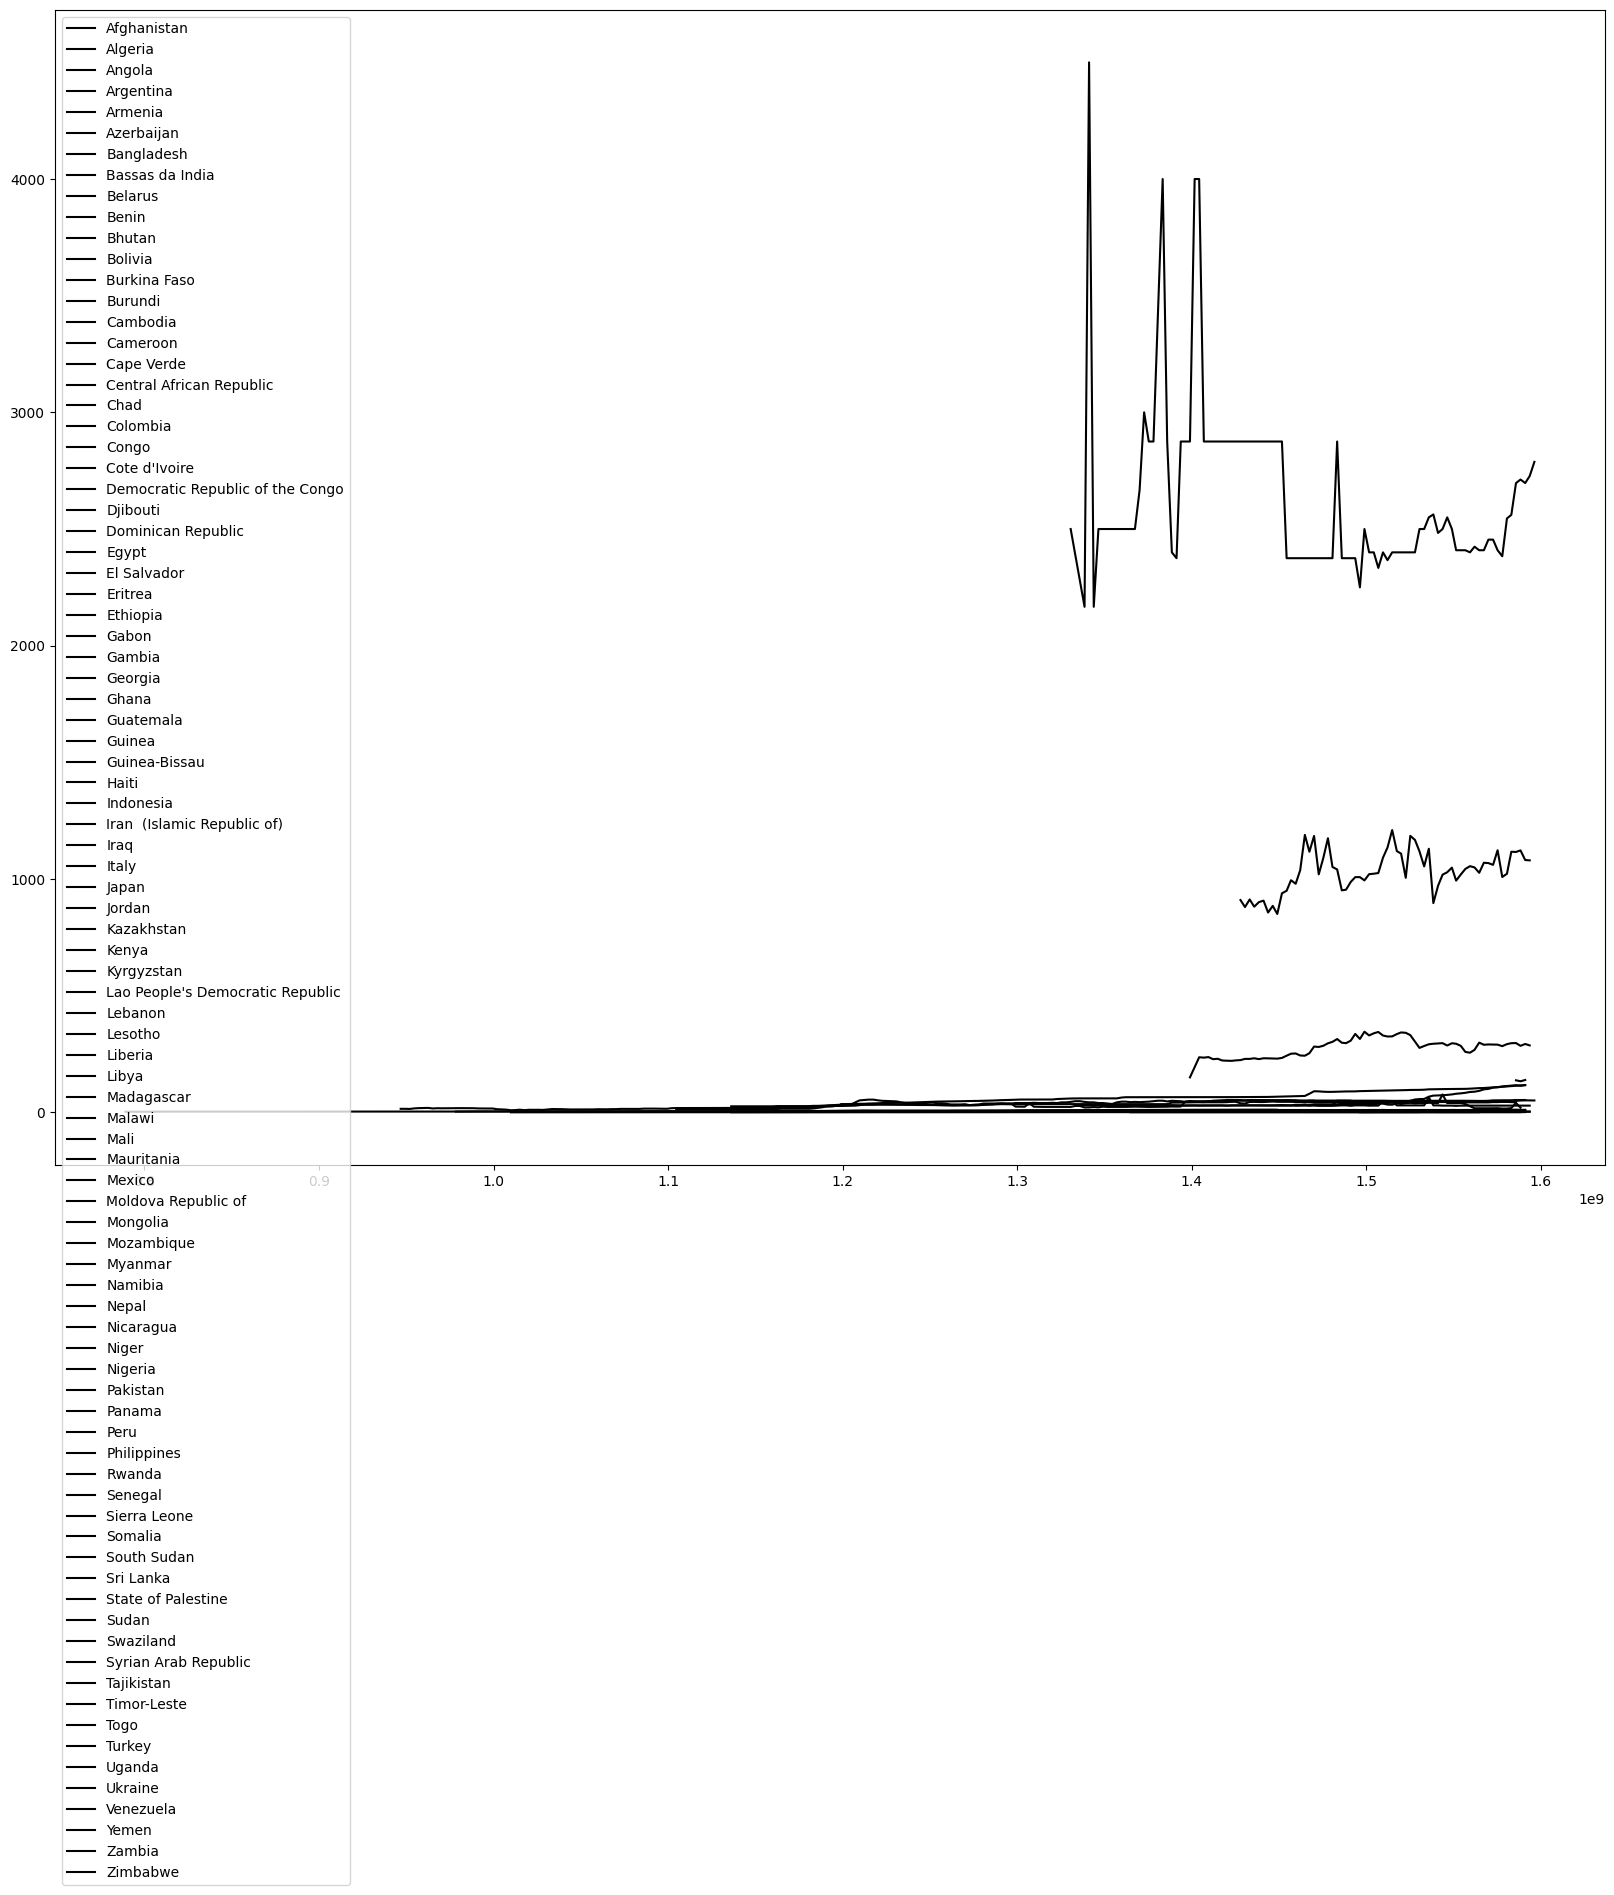

In [47]:
# Goal: Every Average for every counrty for ONE product
def GraphAverages(product, countries = df['Country'].unique()):

    plt.figure(figsize=(20,15))
    for country in countries:
        tempDF = df.loc[(df['Country']== country) & (df['Product Name']== product)]
        tempDF_AverageMarketPrice =  tempDF.groupby('Date')['Market Price'].mean()
        tempDF_AverageMarketPrice = tempDF_AverageMarketPrice.reset_index()

        #Graph it
        plt.plot(tempDF_AverageMarketPrice['Date'].apply(datetimeToFloat),tempDF_AverageMarketPrice['Market Price'],label=country, color='black');

        # plt.title("Average Price of {} in {}".format(product, country))
        # plt.xlabel("Date")
        # plt.ylabel("Price ({})".format(tempDF['Currency'].unique()[0]))
    plt.legend()
    plt.show()



    # DF_ProductDetails = df.loc[(df['Country']== country) & (df['Product Name']== product)]
    # cities = DF_ProductDetails['City'].unique()
    # sectionSize = math.ceil(len(cities) / NUM_STYLES)
    # # print(len(tempDF['City'].unique()))
    # # print(sectionSize)
    # plt.figure(figsize=(20,15))

    # # colorRGBlist = sns.color_palette(palette='gist_rainbow',n_colors = sectionSize)
    # colorRGBlist = sns.color_palette(palette='hsv',n_colors = sectionSize)

    # hexColorIndex = 0
    # lineStyleIndex = -1

    # #Create empty df with Date, province, market, price
    # # display(DF_ProductDetails)
    # DF_AverageMarketPrice =  DF_ProductDetails.groupby('Date')['Market Price'].mean()
    # DF_AverageMarketPrice = DF_AverageMarketPrice.reset_index()
    # # display(test)

    # for label_num in range(len(cities)):
    #     # print("label_num % (math.ceil(len(cities) / NUM_STYLES)) = {0}".format(label_num % (math.ceil(len(cities) / NUM_STYLES))))
    #     label = cities[label_num]
    #     if label_num % (math.ceil(len(cities) / NUM_STYLES)) == 0:
    #         lineStyleIndex+=1
    #         hexColorIndex = 0


    #     productPriceCity = DF_ProductDetails.loc[(DF_ProductDetails['City']==label)]
    #     plt.plot(productPriceCity['Date'].apply(datetimeToFloat),productPriceCity['Market Price'],label=label, color=colorRGBlist[hexColorIndex], linestyle=LINE_STYLES[lineStyleIndex]);
    #     # sns.regplot(x=productPriceCity['Date'].apply(datetimeToFloat),y=productPriceCity['Market Price'],label=label, color=colorRGBlist[hexColorIndex], logx=True);
    #     # sns.regplot(x=DF_AverageMarketPrice['Date'].apply(datetimeToFloat),y=DF_AverageMarketPrice['Market Price'],label=label, color=colorRGBlist[hexColorIndex]);
    #     hexColorIndex += 1
    # plt.plot(DF_AverageMarketPrice['Date'].apply(datetimeToFloat),DF_AverageMarketPrice['Market Price'],label="Average", color='black');

        
    # plt.legend()
    # plt.title("Average Price of {} in {}".format(product, country))
    # plt.xlabel("Date")
    # plt.ylabel("Price ({})".format(DF_ProductDetails['Currency'].unique()[0]))
    # plt.show()
        

country = "Afghanistan"
product = "Bread"
# GraphAverages(product, [country])
print(type(df['Country'].unique()))
GraphAverages(product)

# Wishlist
Graphs:
- [X] Price of item in a country (different lines represent different markets) 
- [ ] Average price of each item in a country (different lines/colors represent different products)
- [ ] Global price rates of W.H.O. Staple foods (i.e. corn, rice,potato)
- [ ] When looking at a product in all countries, we need to standarize Currency to USD (CurrencyConverter library) 

Some way to input what we want to see (i.e. 'rice','global')

Some way to collate the datapoints of a single product in a single country to one line (regression? ML? )

 -> everntually graph all products in one country